# Athlete Analysis – Will Clayton

### import libraries

In [39]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import importlib
import matplotlib.dates as mdates

### read the data

In [27]:
file_path = r'C:\Users\leopo\OneDrive\Documents\coding\projects\tfrrs_scraper\data\2015_to_2024'


data = pd.read_feather(file_path)

### view a sample of the data

In [28]:
pd.set_option('display.max_columns', None)
data.head(3)

,athlete_name,last_name,first_name,athlete_id,year_when_scraped,school,school_scraped_url,division,region,main_conference,other_conferences_found,gender,transfers,has_transferred,meet_name,meet_date,events_competed_in_meet,event,n_event_of_meet,performance,place,event_stage,wind,meet_type,scraped_for_school,athlete_url,year_scraped_roster,year_scraped_season,year_scraped_year,school_roster_size,parsed_date,converted_performance,granular_performance,school_state
0,ALEXANDRIA DONAHUE,Donahue,Alexandria,81_S'YRAM-.TS-TNUOM_EUHANODAIRDNAXELA,SR-4,MOUNT ST. MARY'S,https://tf.tfrrs.org/teams/tf/MD_college_f_Mou...,DI,Mid-Atlantic Region,Metro Atlantic,[IC4A/ECAC],F,None,0,Northeast Conference Championship,"May 2- 3, 2015",3,SP,1,11.74m,9th,F,(+0.0),tf,MOUNT ST. MARY'S,https://www.tfrrs.org/athletes/3723706/Mount_S...,2015,outdoor,2015,27,2015-05-02,0 days 00:00:11.740000,11.74,MD
1,ALEXANDRIA DONAHUE,Donahue,Alexandria,81_S'YRAM-.TS-TNUOM_EUHANODAIRDNAXELA,SR-4,MOUNT ST. MARY'S,https://tf.tfrrs.org/teams/tf/MD_college_f_Mou...,DI,Mid-Atlantic Region,Metro Atlantic,[IC4A/ECAC],F,None,0,Northeast Conference Championship,"May 2- 3, 2015",3,DT,2,34.52m,16th,F,(+0.0),tf,MOUNT ST. MARY'S,https://www.tfrrs.org/athletes/3723706/Mount_S...,2015,outdoor,2015,27,2015-05-02,0 days 00:00:34.520000,34.52,MD
2,ALEXANDRIA DONAHUE,Donahue,Alexandria,81_S'YRAM-.TS-TNUOM_EUHANODAIRDNAXELA,SR-4,MOUNT ST. MARY'S,https://tf.tfrrs.org/teams/tf/MD_college_f_Mou...,DI,Mid-Atlantic Region,Metro Atlantic,[IC4A/ECAC],F,None,0,Northeast Conference Championship,"May 2- 3, 2015",3,HT,3,49.65m,5th,F,(+0.0),tf,MOUNT ST. MARY'S,https://www.tfrrs.org/athletes/3723706/Mount_S...,2015,outdoor,2015,27,2015-05-02,0 days 00:00:49.650000,49.65,MD


### get only Will Clayton's data

In [29]:
will_clayton_data = data[
    (data['athlete_name'] == 'WILL CLAYTON') &
    (data['school'] == 'CHRISTIAN BROS.')
]

### view a sample of Will Clayton's data

In [36]:
will_clayton_data.head(3)

,athlete_name,last_name,first_name,athlete_id,year_when_scraped,school,school_scraped_url,division,region,main_conference,other_conferences_found,gender,transfers,has_transferred,meet_name,meet_date,events_competed_in_meet,event,n_event_of_meet,performance,place,event_stage,wind,meet_type,scraped_for_school,athlete_url,year_scraped_roster,year_scraped_season,year_scraped_year,school_roster_size,parsed_date,converted_performance,granular_performance,school_state
17350210,WILL CLAYTON,Clayton,Will,21_.SORB-NAITSIRHC_NOTYALCLLIW,SR-4,CHRISTIAN BROS.,https://tf.tfrrs.org/teams/tf/TN_college_m_Chr...,DII,South Region,Gulf South,[],M,None,0,2024 Gulf South Conference Outdoor Championship,"May 2- 4, 2024",2,5000,1,15:42.13,16th,F,,tf,CHRISTIAN BROS.,https://www.tfrrs.org/athletes/7379036/Christi...,2020,outdoor,2020,22,2024-05-02,0 days 00:15:42.130000,942.13,TN
17350211,WILL CLAYTON,Clayton,Will,21_.SORB-NAITSIRHC_NOTYALCLLIW,SR-4,CHRISTIAN BROS.,https://tf.tfrrs.org/teams/tf/TN_college_m_Chr...,DII,South Region,Gulf South,[],M,None,0,2024 Gulf South Conference Outdoor Championship,"May 2- 4, 2024",2,3000S,2,9:43.31,7th,F,,tf,CHRISTIAN BROS.,https://www.tfrrs.org/athletes/7379036/Christi...,2020,outdoor,2020,22,2024-05-02,0 days 00:09:43.310000,583.31,TN
17350212,WILL CLAYTON,Clayton,Will,21_.SORB-NAITSIRHC_NOTYALCLLIW,SR-4,CHRISTIAN BROS.,https://tf.tfrrs.org/teams/tf/TN_college_m_Chr...,DII,South Region,Gulf South,[],M,None,0,Memphis Tiger Invitational,"Apr 26-27, 2024",1,1500,1,4:13.60,15th,F,,tf,CHRISTIAN BROS.,https://www.tfrrs.org/athletes/7379036/Christi...,2020,outdoor,2020,22,2024-04-26,0 days 00:04:13.600000,253.60,TN


### get a quick summary of Will Clayton

In [ ]:
import athlete_overview as ao #import the athlete overview module

importlib.reload(ao)    #reload the modele to ensure it has the latest changes

ao.summarize_athlete(data, 'WILL CLAYTON')

name: WILL CLAYTON
first race: 2019-09-07 00:00:00
last race: 2024-05-02 00:00:00
school: CHRISTIAN BROS.
conference: Gulf South
region: South Region
division: DII
unique events:['5000' '3000S' '1500' '3000' '9.8k' '8k' '6k' '4M' '10k' '2000S' 'DMR'
 'Mile']


### look at Will Clayton's development for each event over his college career

C:\Users\leopo\AppData\Local\Temp\ipykernel_22748\679522672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  will_clayton_data['parsed_date'] = pd.to_datetime(will_clayton_data['parsed_date'])
C:\Users\leopo\AppData\Local\Temp\ipykernel_22748\679522672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  will_clayton_data['year'] = will_clayton_data['parsed_date'].dt.year


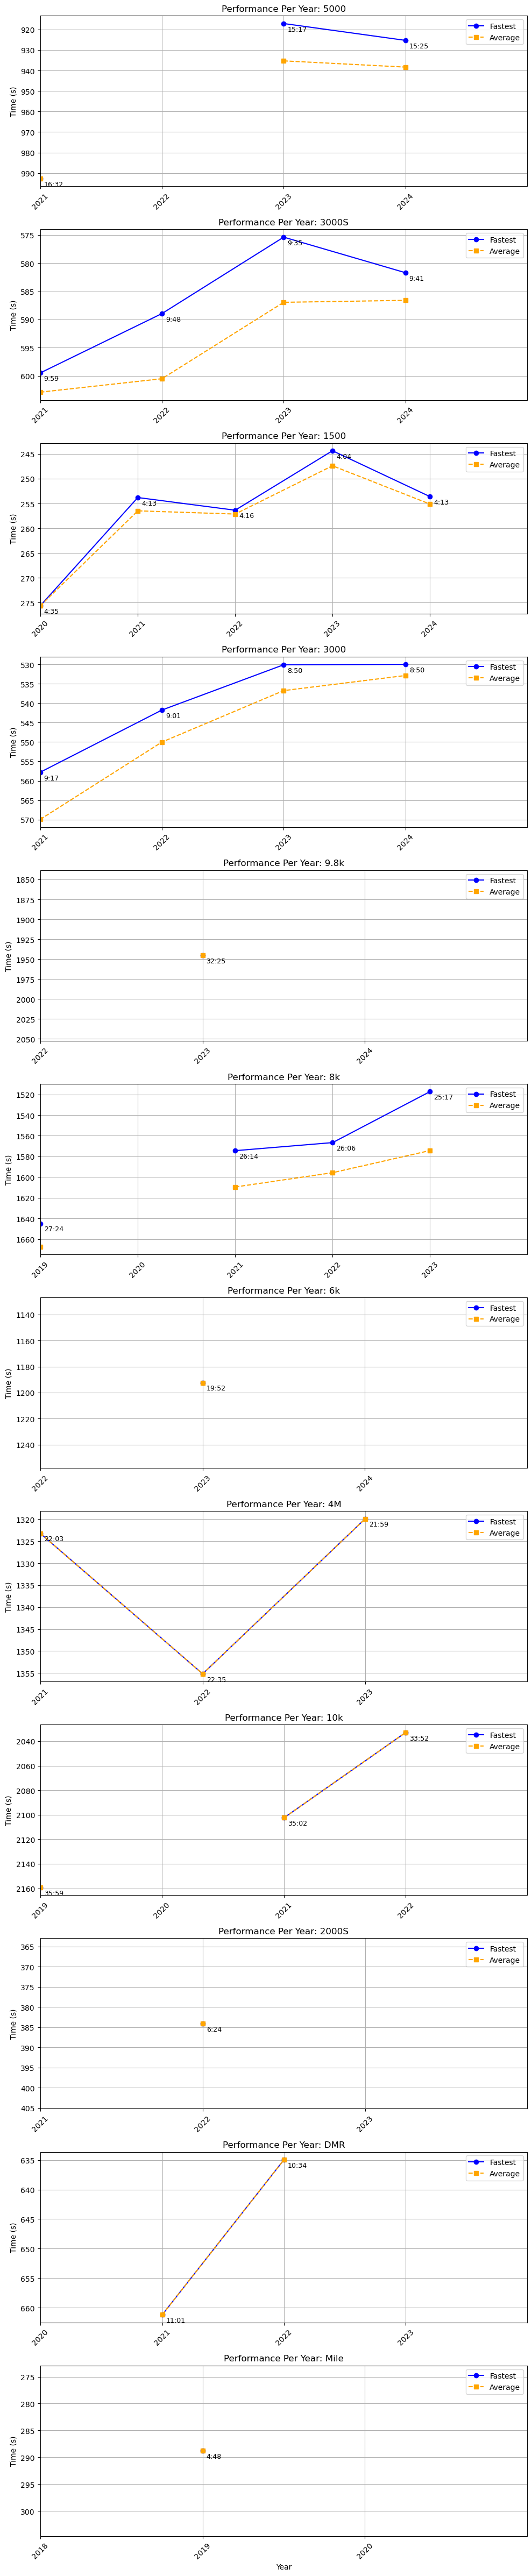

In [44]:
# Ensure 'parsed_date' is datetime and extract year
will_clayton_data['parsed_date'] = pd.to_datetime(will_clayton_data['parsed_date'])
will_clayton_data['year'] = will_clayton_data['parsed_date'].dt.year

events = will_clayton_data['event'].unique()
num_events = len(events)

fig, axes = plt.subplots(num_events, 1, figsize=(10, 4 * num_events))
if num_events == 1:
    axes = [axes]

for ax, event in zip(axes, events):
    df_event = will_clayton_data[will_clayton_data['event'] == event].copy()

    min_year = df_event['year'].min()
    max_year = df_event['year'].max()
    event_years = pd.Series(range(min_year, max_year + 1))

    # Group by year and compute fastest and average
    df_summary = (
        df_event.groupby('year', as_index=False)
        .agg({
            'granular_performance': ['min', 'mean']
        })
    )
    df_summary.columns = ['year', 'fastest', 'average']
    df_summary = df_summary.set_index('year').reindex(event_years)

    df_summary['year_date'] = pd.to_datetime(df_summary.index, format='%Y')

    def format_mmss(seconds):
        if pd.isna(seconds):
            return ""
        minutes = int(seconds // 60)
        secs = int(seconds % 60)
        return f"{minutes}:{secs:02d}"

    df_summary['mmss'] = df_summary['fastest'].apply(format_mmss)

    # Plot fastest and average
    ax.plot(df_summary['year_date'], df_summary['fastest'], marker='o', label='Fastest', color='blue')
    ax.plot(df_summary['year_date'], df_summary['average'], marker='s', label='Average', color='orange', linestyle='--')

    ax.set_title(f'Performance Per Year: {event}')
    ax.set_ylabel('Time (s)')
    ax.invert_yaxis()
    ax.grid(True)

    # Annotate fastest with mm:ss
    for i, row in df_summary.iterrows():
        if pd.notna(row['fastest']):
            ax.annotate(row['mmss'], (row['year_date'], row['fastest']),
                        textcoords="offset points", xytext=(5, -10), ha='left', fontsize=9)

    # Format x-axis
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.tick_params(axis='x', rotation=45)

    # Smart x-axis padding
    if len(event_years) == 1:
        center_year = event_years.iloc[0]
        ax.set_xlim(pd.Timestamp(f'{center_year - 1}-01-01'), pd.Timestamp(f'{center_year + 1}-12-31'))
    elif len(event_years) == 2:
        left = event_years.iloc[0] - 1
        right = event_years.iloc[1] + 1
        ax.set_xlim(pd.Timestamp(f'{left}-01-01'), pd.Timestamp(f'{right}-12-31'))
    else:
        ax.set_xlim(pd.Timestamp(f'{min_year}-01-01'), pd.Timestamp(f'{max_year}-12-31'))

    ax.legend()

axes[-1].set_xlabel('Year')
plt.tight_layout()
plt.show()

### compare Will Clayton's performances across division, conference, and region benchmarks